In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-08-03 01:07:52.507511: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 01:07:52.543095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 01:07:52.543130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 01:07:52.544040: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 01:07:52.550168: I tensorflow/core/platform/cpu_feature_guar

In [4]:
# 訓練用とテスト用のデータパスを設定する
train_data_path = '/home/jovyan/work/1/data/data/cats_and_dogs/train'
test_data_path = '/home/jovyan/work/1/data/data/cats_and_dogs/validation'


In [5]:
# ImageDataGeneratorをインスタンス化し、データ拡張パラメータを追加する
train_datagen = ImageDataGenerator(
    rescale=1./255,          # 画像をスケール変換
    rotation_range=30,       # 画像をランダムに回転させる度数範囲
    width_shift_range=0.1,   # 画像を水平にランダムにシフトする範囲（全体の幅の比率）
    height_shift_range=0.1,  # 画像を垂直にランダムにシフトする範囲（全体の高さの比率）
    shear_range=0.3,         # ランダムにシアー変換を加える強度
    zoom_range=0.2,          # 画像をランダムにズームする範囲
    horizontal_flip=True,    # 画像を水平にランダムに反転させる
    fill_mode='nearest'      # 新たに作成されたピクセルを埋める方法
)

# テストデータにはデータ拡張を適用しない（リスケールのみ）
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# データ生成器を作成
train_generator = train_datagen.flow_from_directory(
    train_data_path,             # トレーニングデータのフォルダパス
    target_size=(150, 150),      # 画像のリサイズ後のサイズ
    batch_size=32,
    class_mode='binary'          # 2値分類
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

print(train_generator.class_indices)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [9]:
# モデルを構築（ResNet50を基盤として使用）
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
# 最適化器を設定
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# モデルを訓練
train_samples = train_generator.samples
test_samples = test_generator.samples

history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // 32,
    epochs=80,
    validation_data=test_generator,
    validation_steps=test_samples // 32
)

# モデルを保存
model.save('model3.h5')

Epoch 1/80


2024-08-03 01:08:07.620801: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-08-03 01:08:11.754274: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fbae9b910c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-03 01:08:11.754310: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe MIG 1g.10gb, Compute Capability 8.0
I0000 00:00:1722647291.822935    3512 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 [==============================] - 20s 188ms/step - loss: 0.7529 - accuracy: 0.4746 - val_loss: 0.6930 - val_accuracy: 0.4990
Epoch 2/80
62/62 [==============================] - 10s 159ms/step - loss: 0.6935 - accuracy: 0.5041 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/80
62/62 [==============================] - 10s 159ms/step - loss: 0.6937 - accuracy: 0.5020 - val_loss: 0.6927 - val_accuracy: 0.5050
Epoch 4/80
62/62 [==============================] - 10s 159ms/step - loss: 0.6936 - accuracy: 0.5066 - val_loss: 0.6927 - val_accuracy: 0.4990
Epoch 5/80
62/62 [==============================] - 10s 159ms/step - loss: 0.6927 - accuracy: 0.5051 - val_loss: 0.6992 - val_accuracy: 0.5010
Epoch 6/80
62/62 [==============================] - 10s 161ms/step - loss: 0.6939 - accuracy: 0.4888 - val_loss: 0.6927 - val_accuracy: 0.5524
Epoch 7/80
62/62 [==============================] - 10s 160ms/step - loss: 0.6935 - accuracy: 0.4893 - val_loss: 0.6926 - val_accuracy: 0.5020
Epoch 8/80

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


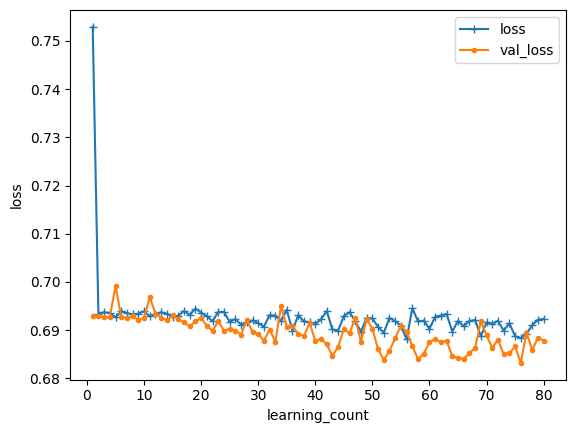

In [10]:
# 绘制损失图表
loss = history.history['loss']
val_loss = history.history['val_loss']

learning_count = len(loss) + 1

plt.plot(range(1, learning_count),loss,marker='+',label='loss')
plt.plot(range(1, learning_count),val_loss,marker='.',label='val_loss')
plt.legend(loc = 'best', fontsize=10)
plt.xlabel('learning_count')
plt.ylabel('loss')
plt.show()

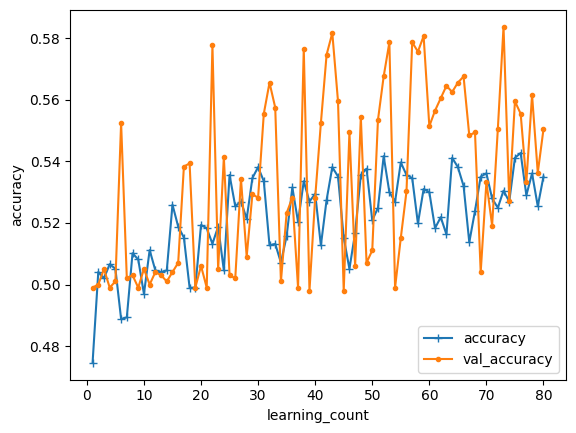

In [11]:
# 绘制准确率图表
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(range(1, learning_count),accuracy,marker='+',label='accuracy')
plt.plot(range(1, learning_count),val_accuracy,marker='.',label='val_accuracy')
plt.legend(loc = 'best', fontsize=10)
plt.xlabel('learning_count')
plt.ylabel('accuracy')
plt.show()